<IPython.core.display.Javascript object>


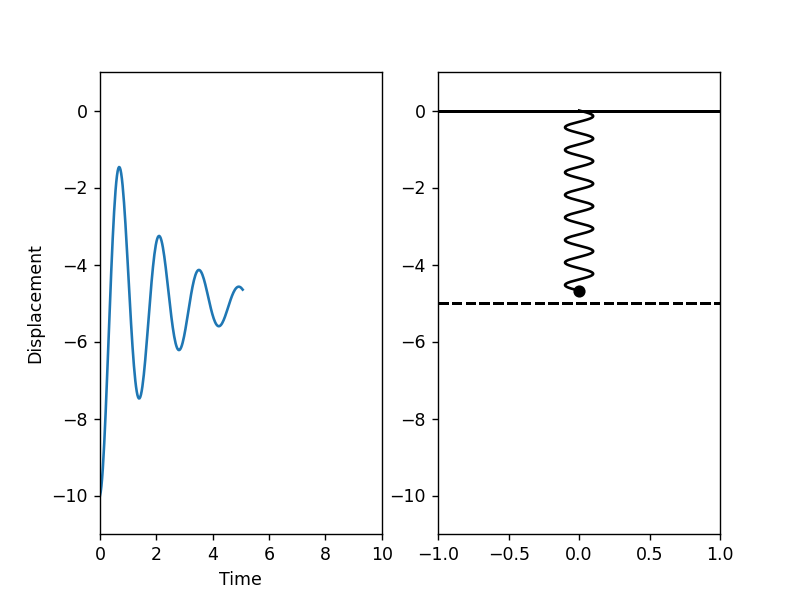

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


A = 5
b = 10
m = 10
k = 200
w = np.sqrt((k / m) - (b / (2 * m))**2)

t = np.linspace(0,10,400)
x = []
p = []

fig, ax = plt.subplots(1,2)

line, = ax[0].plot([], [])
dot, = ax[1].plot([], [], 'ko')
arm, = ax[1].plot([], [], 'k-')

ax[0].set(xlim = (0, 10), ylim = (-2 * A - 1,1))
ax[1].set(xlim=(-1, 1), ylim = (-2 * A -1,1))
ax[0].set(xlabel='Time', ylabel='Displacement')



def init():
    ax[1].plot([-1,1],[0,0], 'k-')
    ax[1].plot([-1,1],[-A,-A], 'k--')

def animate(i):
    
    x.append((-(A * np.exp(-b * t[i] / (2 * m)) * np.cos(w * t[i])))-A)
    
    line.set_data(t[:i], x[:i])

    c = x[i]
    spring_height = np.linspace(0,c,1000)
    spring = 0.1 * (np.sin(16*np.pi/c * spring_height))
    arm.set_data(spring, spring_height)
    dot.set_data(0, x[i])

    return dot, line, arm,

anim = FuncAnimation(fig, 
                     animate, 
                     frames=400,
                     interval=1,
                     init_func = init,
                     blit=True)
plt.show()